In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

1. Random variables: </br>
<ul>
    <li>T: uniform[0,theta] random values (count = sample_size)</li>
</ul>
</br>
2. Statistics (possible theta estimators): </br>
<ul>
    <li>Mean(T) - sample mean</li>
    <li>Min(T) - sample min</li>
    <li>Max(T) - sample max</li>
</ul>
</br>
3. Parameters</br>
<ul>
    <li>Theta = 10</li>
</ul>

In [2]:
theta = 10
#T = [0,theta]
def T(theta, sample_size):
    return uniform.rvs(0,theta,sample_size)

def Mean(sample):
    return sample.mean()

def Min(sample):
    return sample.min()

def Max(sample):
    return sample.max()

def error(theta,stat, T):
    print("theta =",theta)
    print("theta estimator:",stat)
    mse = 0
    error_arr=[]
    sample_sizes=range(1000,100000,1000)
    for sample_size in sample_sizes:
        theta_appr = stat(T(theta,sample_size))
        sqe=(theta-theta_appr)**2
        mse+=sqe
        error_arr.append(sqe)
    mse/=len(sample_sizes)
    print("mean squared error:",mse)
    plt.plot(sample_sizes,error_arr, color="b", label="squared error")
    plt.axhline(mse,color="r", label="mean squared error")

theta = 10
theta estimator: <function Max at 0x0000021551763010>
mean squared error: 4.637441558872359e-06


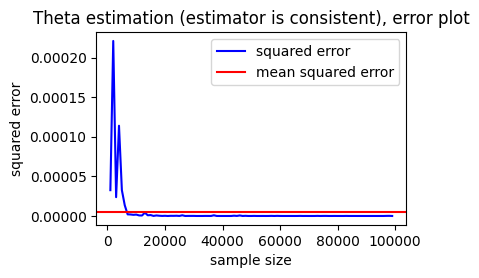

In [3]:
plt.gcf().set_size_inches(4,2.5)
plt.xlabel("sample size")
plt.ylabel("squared error")
error(theta,Max, T)
plt.legend(loc=1)
plt.title("Theta estimation (estimator is consistent), error plot")
plt.show()

theta = 10
theta estimator: <function Mean at 0x0000021551762EF0>
mean squared error: 25.028956046396345


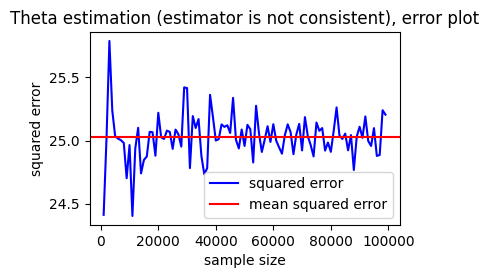

In [4]:
plt.gcf().set_size_inches(4,2.5)
plt.xlabel("sample size")
plt.ylabel("squared error")
error(theta,Mean, T)
plt.legend(loc=4)
plt.title("Theta estimation (estimator is not consistent), error plot")
plt.show()

In [5]:
help(uniform.rvs)

Help on method rvs in module scipy.stats._distn_infrastructure:

rvs(*args, **kwds) method of scipy.stats._continuous_distns.uniform_gen instance
    Random variates of given type.
    
    Parameters
    ----------
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information).
    loc : array_like, optional
        Location parameter (default=0).
    scale : array_like, optional
        Scale parameter (default=1).
    size : int or tuple of ints, optional
        Defining number of random variates (default is 1).
    random_state : {None, int, `numpy.random.Generator`,
                    `numpy.random.RandomState`}, optional
    
        If `seed` is None (or `np.random`), the `numpy.random.RandomState`
        singleton is used.
        If `seed` is an int, a new ``RandomState`` instance is used,
        seeded with `seed`.
        If `seed` is already a ``Generator`` or ``RandomState`` 

In [6]:
class bcolors:
    """Print colored text to the terminal"""
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    
def success(text):
    print(bcolors.OKGREEN + text + bcolors.ENDC)
    
def fail(text):
    print(bcolors.FAIL + text + bcolors.ENDC)

- Function <b>isSimpleRandomSample(T, theta, expected_range, eps)</b> - check if uniformly distributed random
    variable T is a simple random sample for given expected range [a,b].</pre>
<ol>
    <li>Calculate expected mean and standard deviation for Uniform[a,b]</li>
    <li>Iterate over sample size (=n). min: $10$, max: $10^7$</li>
    - for each sample size (=n):<ul>
        <li>Generate a new sample of size n</li>
        <li>Calculate [a_iter,b_iter] == [min(sample),max(sample)]</li>
        <li>Evaluate p-value == P(x&#60a_iter or x&#62b_iter)</li>
        <li>Calculate sample mean and standard deviation</li>
        <li>Assume that each sample (T(n)) values are generated independently, accorting to the above documentation</li>
        <li>=> In order to prove that T(n) is a simple random sample, we need to check that the random variable T(n) is not limited for the population = [0,theta]</li>
        <li>Therefore, it is necessary and sufficient to check that lim(p-value)=0, n->inf for a given eps.</li>
        <li>=> If abs(0-p_value)== p_value,  p_value>0 is less than eps, T is a simple random sample.</li>
        - return True
    </ul>
    <li>Else:</li>
    - return False
</ol>

In [11]:
from math import sqrt

def isSimpleRandomSample(T, theta, expected_range, eps):
    a_iter=None
    b_iter=None
    diff = abs(expected_range[0]-expected_range[1])
    sample_sizes = [int(x) for x in [10,1e2,1e3,1e4,1e5,1e6, 1e7]]
    print("expected range:",expected_range)
    expected_mean = (expected_range[1]-expected_range[0])/2
    expected_std = sqrt(1/12 * (expected_range[1]-expected_range[0])**2)
    print("expected mean:",expected_mean)
    print("expected standard deviation:",expected_std)
    print()
    for size in sample_sizes:
        samp = T(theta, size)
        a_iter = samp.min()
        b_iter = samp.max()
        
        p_value = abs(a_iter-expected_range[0])/diff + abs(b_iter-expected_range[1])/diff
        print("for sample size = %d:"%size)
        print("p_value == P(x<a_iter or x>b_iter) = %.8f"%p_value)
        print("sample mean = E(X):",samp.mean())
        print("sample standard deviation = sqrt(Var(X)):",samp.std())
        print("actual range: ",[a_iter,b_iter])
        print()
        
        if p_value < eps:
            print("Random sample is simple, eps=%e"%eps)
            return True
    return False
    
eps=1e-5
population=[0,theta]

if isSimpleRandomSample(T,theta,population, eps=eps):
    success("\nT(n) generates a simple random sample for expected population=%s, eps=%e"%(population,eps))
else:
    fail("\nT(n) does not generate a simple random sample for expected population=%s, eps=%e"%(population,eps))

expected range: [0, 10.1]
expected mean: 5.05
expected standard deviation: 2.91561885940761

for sample size = 10:
p_value == P(x<a_iter or x>b_iter) = 0.17787227
sample mean = E(X): 5.162769130559536
sample standard deviation = sqrt(Var(X)): 2.6104137023520635
actual range:  [0.4033381469526165, 8.706828236664201]

for sample size = 100:
p_value == P(x<a_iter or x>b_iter) = 0.03234210
sample mean = E(X): 4.660212520313526
sample standard deviation = sqrt(Var(X)): 2.690719409632649
actual range:  [0.024322146209103668, 9.797666945657733]

for sample size = 1000:
p_value == P(x<a_iter or x>b_iter) = 0.01085350
sample mean = E(X): 4.971444129789377
sample standard deviation = sqrt(Var(X)): 2.9752193472018025
actual range:  [0.005138846496184346, 9.995518459634493]

for sample size = 10000:
p_value == P(x<a_iter or x>b_iter) = 0.01001968
sample mean = E(X): 4.975233607006497
sample standard deviation = sqrt(Var(X)): 2.886074259871809
actual range:  [0.00010554313683575067, 9.9989067705838